# Introduction

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.


# Objective

They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

Data Description and features information
age: The age of the individual in years.
gender: The gender of the individual, categorized as male or female.
profession: The occupation or profession of the individual.
marital_status: The marital status of the individual, such as married &, single
education: The educational qualification of the individual Graduate and Post Graduate
no_of_dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
house_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
salary: The individual's salary or income.
partner_salary: The salary or income of the individual's partner, if applicable.
Total_salary: The total combined salary of the individual and their partner (if applicable).
price: The price of a product or service.
make: The type of automobile

Import all the important Libraries

In [22]:
import numpy as np
import pandas as pd
#from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import os

1st step is to read the data file

In [23]:
df = pd.read_csv(".csv")

Check the basic charaterisctics of the given data

In [24]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [189]:
pwd()

'C:\\Users\\dell\\Statistics'

In [25]:
df.shape

(1581, 14)

We have 1581 rows and 14 features in the given data set

In [26]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


- The data has 1581 instances with 14 attributes. 5 integer type, 1 float type and 8 object type(Strings in the column)

Check for the missing values

In [28]:
# Check for missing value in any colum
df.isnull().sum().sort_values(ascending=False)

Partner_salary      106
Gender               53
Age                   0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Total_salary          0
Price                 0
Make                  0
dtype: int64

# Problem1 : Data Overview

In [29]:
# Are there any duplicates?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make


As you see there are no duplicates rows in the given data

<Axes: xlabel='Partner_salary', ylabel='Count'>

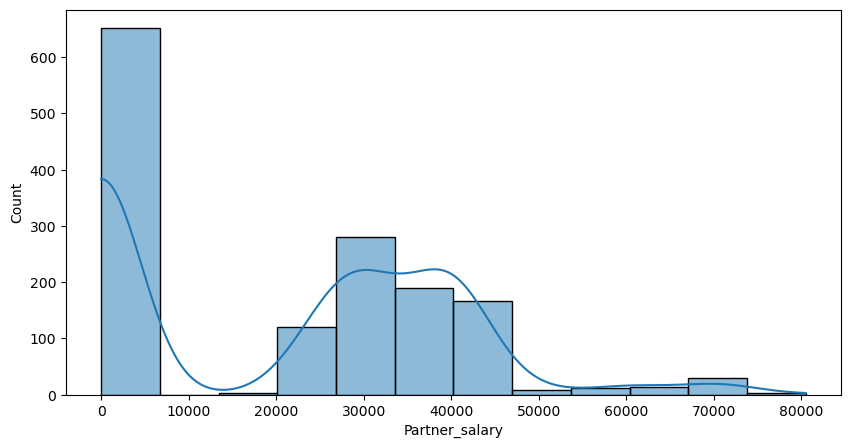

In [30]:
fig,axs = plt.subplots( figsize=(10,5))
sns.histplot(data=df,x='Partner_salary', kde=True)
#sns.boxplot(x='Partner_salary ',data=df, ax=axs[1])

<Axes: xlabel='Partner_salary'>

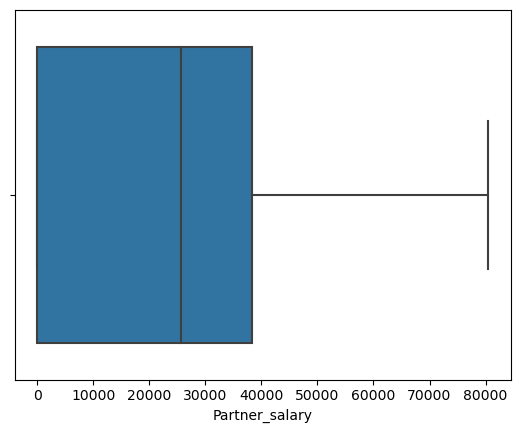

In [31]:
sns.boxplot(x='Partner_salary',data=df)

In [32]:
# Creating a new DF from the original to impute the missing values and do the EDA
df5=df.copy()

In [33]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [34]:
df5.isna().sum().sort_values(ascending=False)

Partner_salary      106
Gender               53
Age                   0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [35]:
# Replace na in Gender features with Male as the Male population in data set is significantly higher.
df5.Gender.fillna('Male',inplace=True)

In [36]:
df5.isna().sum().sort_values(ascending=False)

Partner_salary      106
Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [37]:
df5.Gender.value_counts()

Male      1252
Female     327
Femal        1
Femle        1
Name: Gender, dtype: int64

In [38]:
# Treating the bad data , as we see we have couple of data entry errors in Gender columns
df5.Gender.replace(to_replace='Femal', value='Female', inplace= True)
df5.Gender.replace(to_replace='Femle', value='Female', inplace= True)

In [39]:
df5.Gender.value_counts()

Male      1252
Female     329
Name: Gender, dtype: int64

In [40]:
df5.isna().sum().sort_values(ascending=False)

Partner_salary      106
Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [41]:
# As we see we dont have any outliers in the Partener salary, it is better to replace them with average Partner salary which is being done here
df5.Partner_salary = df5.Partner_salary.fillna(df5.Partner_salary.mean())

In [42]:
df5.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1581,2,Male,1252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [43]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


In [44]:
df5.isna().sum().sort_values(ascending=False)

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [45]:
df5.head(20)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV


# Problem 1 - Univariate Analysis

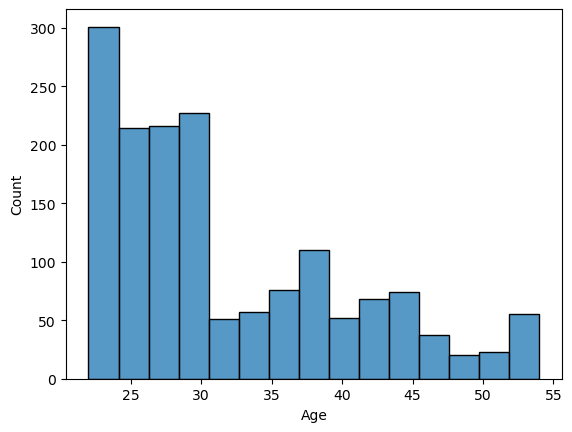

In [46]:
sns.histplot(data=df5,x='Age');

Observations:
    1. We see most of People Age is < 30
    2. It wil be good to find out if age determines what type of vehicle is preffered by Age category

In [47]:
df5.Profession.value_counts()

Salaried    896
Business    685
Name: Profession, dtype: int64

In [48]:
df5.Marital_status.value_counts()

Married    1443
Single      138
Name: Marital_status, dtype: int64

In [49]:
df5.Education.value_counts()

Post Graduate    985
Graduate         596
Name: Education, dtype: int64

In [50]:
df5.Personal_loan.value_counts()

Yes    792
No     789
Name: Personal_loan, dtype: int64

In [51]:
df5.House_loan.value_counts()

No     1054
Yes     527
Name: House_loan, dtype: int64

In [52]:
df5.Partner_working.value_counts()

Yes    868
No     713
Name: Partner_working, dtype: int64

Observation from Univariant Analysis:

1. We have bigger sample of daata who are salaried, it will be good to know if profession decides preference of Vehicle
2. Most of the people are married in the data set
3. Data is higher for the Post Graduate people
4. Personal Loan is about ave for people with loan or not
5. Most of the people have House Loan
6. Also not significant difference between the people with our without working partnet

Obersevation:
    1. Majority of the people have 2 or 3 dependents and this would be interesting to know thier choice of cars

In [54]:
df5.No_of_Dependents.value_counts()

3    557
2    557
1    229
4    218
0     20
Name: No_of_Dependents, dtype: int64

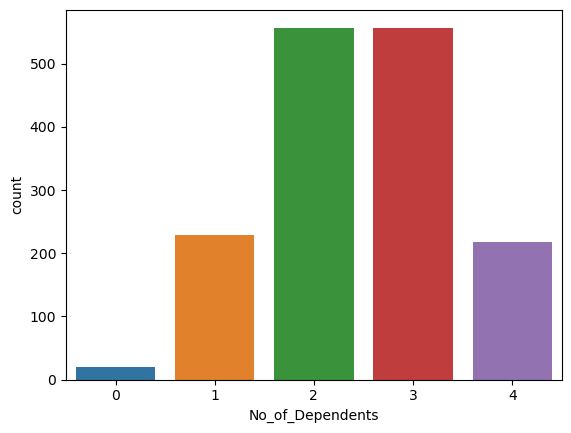

In [137]:
sns.countplot(data=df5,x='No_of_Dependents');

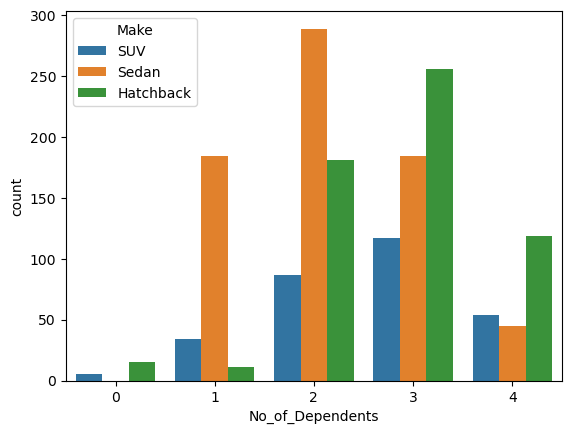

In [138]:
sns.countplot(data=df5,x='No_of_Dependents',hue='Make');

In [55]:
#Salary	Partner_salary	Total_salary	Price

df5.Salary.describe()

count     1581.000000
mean     60392.220114
std      14674.825044
min      30000.000000
25%      51900.000000
50%      59500.000000
75%      71800.000000
max      99300.000000
Name: Salary, dtype: float64

In [56]:
df5.Partner_salary.describe()

count     1581.000000
mean     20225.559322
std      18905.183912
min          0.000000
25%          0.000000
50%      24900.000000
75%      38000.000000
max      80500.000000
Name: Partner_salary, dtype: float64

In [57]:
df5.Total_salary.describe()

count      1581.000000
mean      79625.996205
std       25545.857768
min       30000.000000
25%       60500.000000
50%       78000.000000
75%       95900.000000
max      171000.000000
Name: Total_salary, dtype: float64

<Axes: xlabel='Marital_status', ylabel='count'>

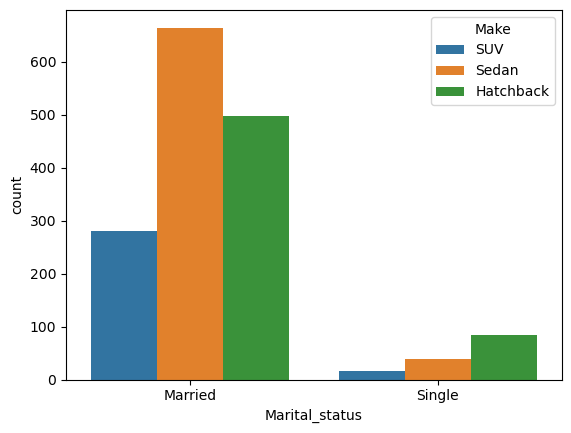

In [58]:
sns.countplot(data=df5, x='Marital_status',hue='Make')

Insights:
1. SUV is least preferred car for both Married as well as Single People
2. Married people prefers Sedan where Hatchback is choice for many Singles

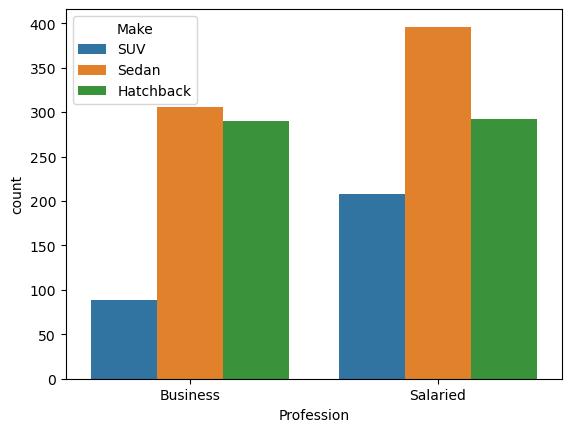

In [59]:
sns.countplot(data=df5, x='Profession',hue='Make');

c

In [60]:
df5.Make.value_counts(normalize=True)

Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: Make, dtype: float64

In [120]:
pd.crosstab(df5.Profession, df5.Make, margins=True, normalize=True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,0.183428,0.056293,0.193548,0.43327
Salaried,0.184693,0.131562,0.250474,0.56673
All,0.368121,0.187856,0.444023,1.00000


Insights:
    1. Total Sedan sale is aroung 44%
    2. Out of which 25% of people who are buying Sedan are Salaried People
    
    

Insights:
    Only ~19% of people have chosen SUV where as Sedan is top choice with 44% followed by Hathcback as about 37%

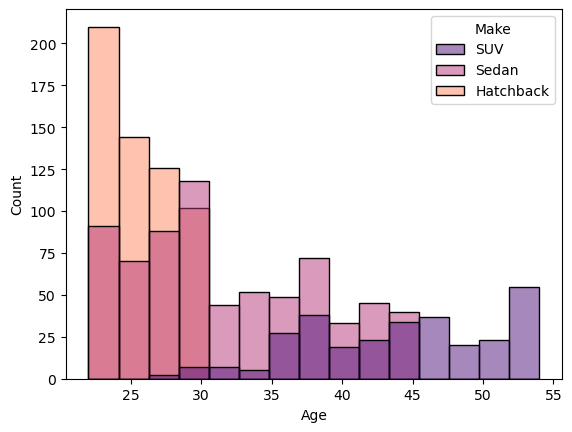

In [61]:
sns.histplot(data=df5,x='Age',hue='Make',palette="magma");

Insights:
SUV is preffered by people with higher age and younger people prefers either Sedan or Hatchback

In [62]:
df5.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [63]:
newdf = df5.copy()

In [64]:
newdf.shape

(1581, 14)

In [65]:
newdf['Salary_Bucket']=pd.cut(newdf['Salary'], 3, labels =['L', "M", "H"])

In [66]:
newdf.head(20)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Salary_Bucket
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,H
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,H
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,H
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,M
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,H
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV,H
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV,H
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV,H
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV,H
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV,H


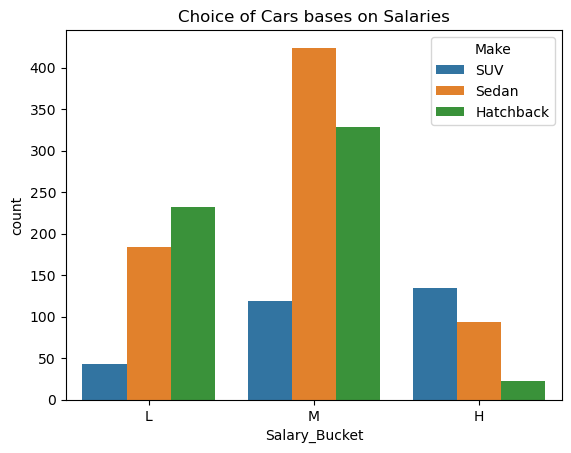

In [67]:
plt.title('Choice of Cars bases on Salaries')
plt.xlim(30,300)
plt.xlabel('Salaries of People')
sns.axes_style('whitegrid')
sns.countplot(data=newdf,x='Salary_Bucket',hue='Make');

Insights:
1. People with lower salaries Prefer Hatchback cars
2. People with High salaries Prefer SUV
3. People with Medium salary range prefer Sedan

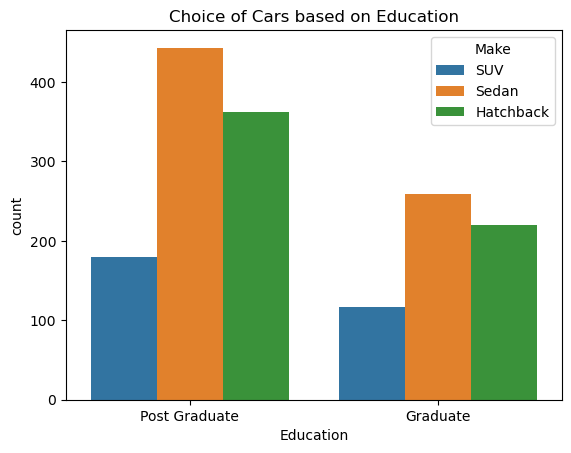

In [68]:
plt.title('Choice of Cars based on Education')
plt.xlim(30,300)
plt.xlabel('Education')
sns.axes_style('whitegrid')
sns.countplot(data=df5,x='Education',hue='Make');

Insights:
    1. People with Post Gradudate Education buys more cars
    2. Sedan seems to choice of cars for most of the educated people
    3. SUV's are preffered least

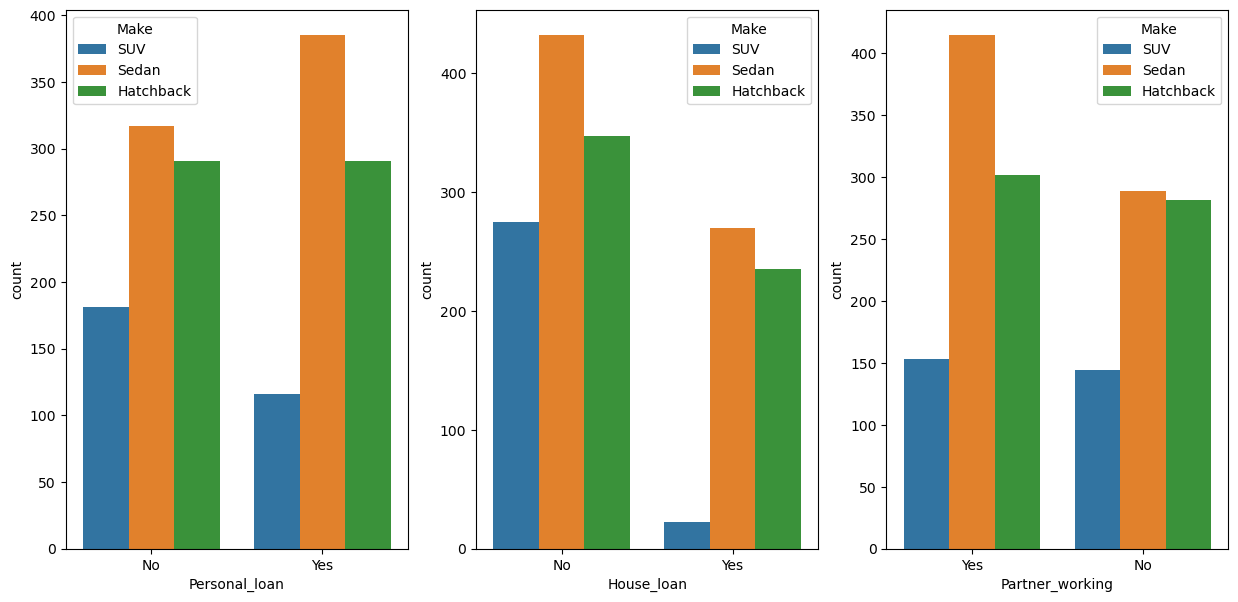

In [69]:
fig,axs = plt.subplots(nrows=1,ncols=3, figsize=(15,7))
sns.countplot(data=df5,x='Personal_loan', hue='Make', ax=axs[0]);
sns.countplot(data=df5,x='House_loan',hue='Make', ax=axs[1]);
sns.countplot(data=df5,x='Partner_working',hue='Make', ax=axs[2]);


Insights:
1. People with Personal loan seems to have more Sedan cars then no Personal Loan People. Are they taking PL for buying cars?
2. People who dont have home loans have buys more cars than people who have home loans.
3. People whose partners are working seem to slighly more Sedan cars than whose partners dont work

So People whose partners are working have more Sedan cars than whose partners dont work. 

In [70]:
newdf.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Salary_Bucket
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,H
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,H
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,H
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,M
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,H


In [71]:
# Create a bucket for low, Medium and High Total Salary and check which vehicle these people prefer

newdf['Total_Salary_Bucket']=pd.cut(newdf['Total_salary'], 3, labels =['L', "M", "H"])

In [72]:
newdf.head(30)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Salary_Bucket,Total_Salary_Bucket
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,H,H
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,H,H
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,H,H
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,M,H
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,H,H
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV,H,H
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV,H,H
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV,H,M
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV,H,M
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV,H,M


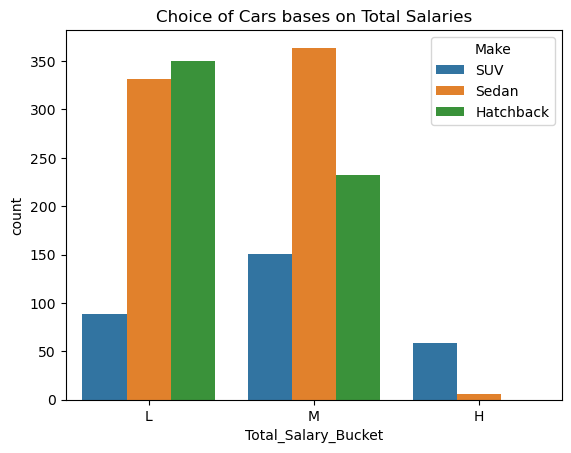

In [73]:
plt.title('Choice of Cars bases on Total Salaries')
plt.xlim(30,300)
plt.xlabel('Total Salaries of People')
sns.axes_style('whitegrid')
sns.countplot(data=newdf,x='Total_Salary_Bucket',hue='Make');

In [141]:
# Create buckets for Partner salaries
newdf['Partner_Salary_Bucket']=pd.cut(newdf['Partner_salary'], 3, labels =['L', "M", "H"])

In [142]:
newdf.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Salary_Bucket,Total_Salary_Bucket,Price_Bucket,Partner_Salary_Bucket
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,H,H,H,H
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,H,H,H,H
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,H,H,H,H
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,M,H,H,H
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,H,H,H,H


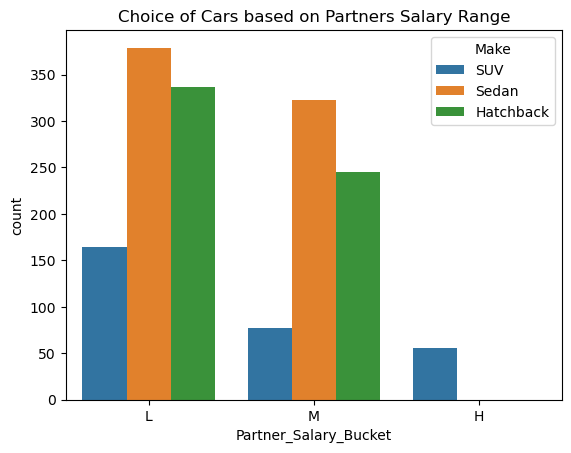

In [144]:
plt.title('Choice of Cars based on Partners Salary Range')
plt.xlim(30,300)
plt.xlabel('Partners Salaries')
sns.axes_style('whitegrid')
sns.countplot(data=newdf,x='Partner_Salary_Bucket',hue='Make');

Insights:
    1. People with high Salaries mostly prefer SUV and no hatchbacks
    2. Low salaries prefer to have Sedan and Hatchbavk
    3. Medium Salaries people mostly prefer Sedan and Hatchbacks

In [74]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1581 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1581 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


# Bivariant Analysis

<Axes: xlabel='Age', ylabel='Salary'>

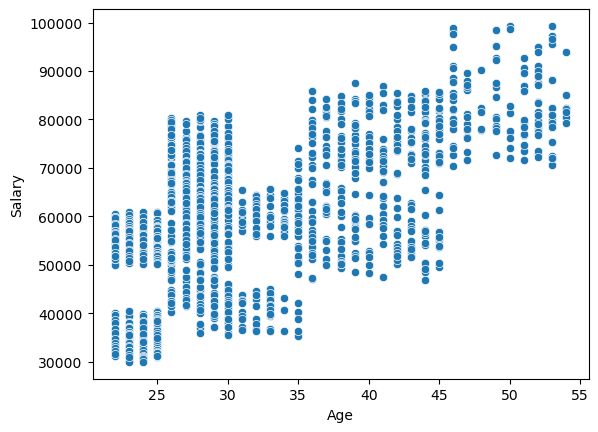

In [75]:
#sns.scatterplot(x='BILL_AMT_AUG', y='PAY_AMT_SEP', data=credit)
sns.scatterplot(data=df5,x='Age',y='Salary')
#plt.ticklabel_format(style='plain', axis='x')

As we see As Age increases the salary also increases which shows there is a positive corelation between Age and Salaries

In [76]:
df5_num = df5.select_dtypes(['float64', 'int64','int32'])
#df5_num = df5_num.drop('ID',axis=1)
#credit_num = credit_num.drop('ID', axis=1)


In [ ]:
df5_num

<Axes: xlabel='Age', ylabel='Price'>

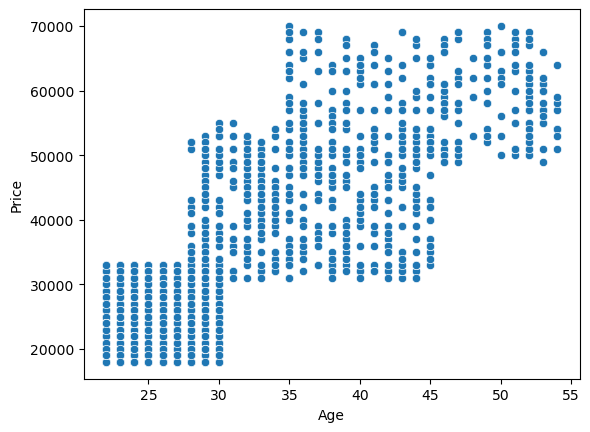

In [145]:
#sns.scatterplot(x='BILL_AMT_AUG', y='PAY_AMT_SEP', data=credit)
sns.scatterplot(data=df5,x='Age',y='Price')
#plt.ticklabel_format(style='plain', axis='x')

In [77]:
corr = df5_num.corr()
round(corr,2)

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
Age,1.00,-0.19,0.62,0.12,0.46,0.80
No_of_Dependents,-0.19,1.00,-0.03,0.13,0.09,-0.14
Salary,0.62,-0.03,1.00,0.07,0.64,0.41
Partner_salary,0.12,0.13,0.07,1.00,0.78,0.16
Total_salary,0.46,0.09,0.64,0.78,1.00,0.37
Price,0.80,-0.14,0.41,0.16,0.37,1.00


# Insights

AGe and Price has postive corelation
Salary and Total Salary with Price also has postive corelation


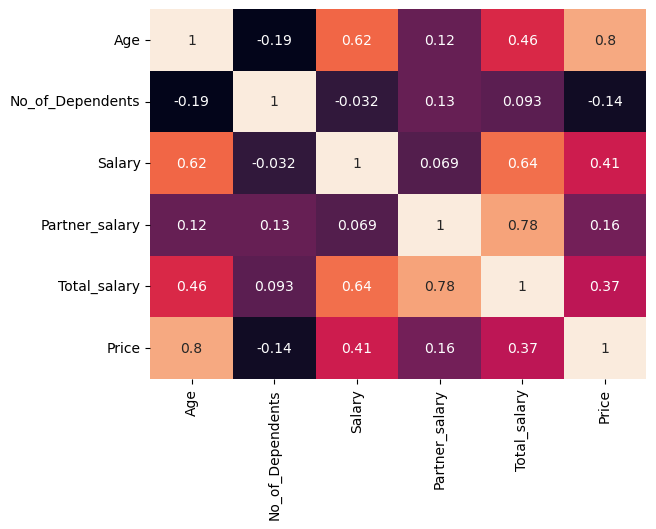

In [78]:
sns.heatmap(data=df5_num[['Age','No_of_Dependents','Salary','Partner_salary','Total_salary','Price']].corr(), annot=True, cbar=False);

<Axes: xlabel='Gender', ylabel='count'>

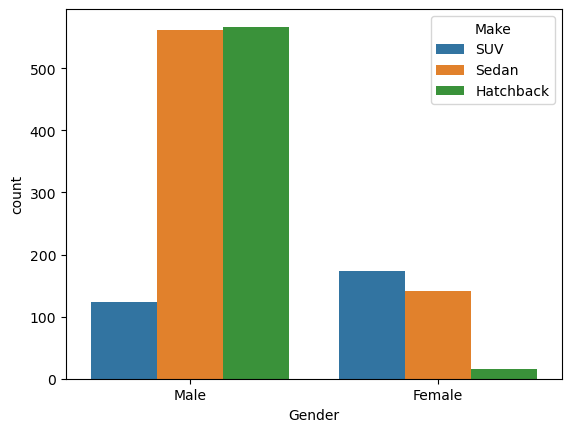

In [146]:
pd.crosstab(df5.Gender, df5.Make, margins=True, normalize=True)

sns.countplot(data=df5, x='Gender',hue='Make')

In [ ]:
#

Insights:
    80% of the people who are buying cars are male and 20% are female
    Hatchbacks are bought by 35% of Male
    Females are buying more SUV than Male
    Sedans are bought by Males in most of times

In [80]:
# Create a bucket for low, Medium and High Total Salary and check which vehicle these people prefer

newdf['Price_Bucket']=pd.cut(newdf['Price'], 3, labels =['L', "M", "H"])


In [81]:
newdf.tail(50)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Salary_Bucket,Total_Salary_Bucket,Price_Bucket
1531,22,Male,Business,Married,Graduate,2,Yes,No,Yes,38500,30000.000000,68500,22000,Hatchback,L,L,L
1532,22,Male,Business,Married,Graduate,3,Yes,Yes,Yes,40100,27800.000000,67900,32000,Hatchback,L,L,L
1533,22,Male,Salaried,Married,Graduate,2,No,No,Yes,36500,30200.000000,66700,22000,Hatchback,L,L,L
1534,22,Male,Salaried,Married,Graduate,2,Yes,Yes,Yes,34900,30900.000000,65800,25000,Hatchback,L,L,L
1535,22,Male,Business,Married,Graduate,3,Yes,No,Yes,33300,30500.000000,63800,25000,Hatchback,L,L,L
1536,22,Female,Salaried,Married,Graduate,3,No,No,Yes,34800,28100.000000,62900,31000,Hatchback,L,L,L
1537,22,Male,Business,Married,Graduate,3,Yes,Yes,Yes,31300,30900.000000,62200,23000,Sedan,L,L,L
1538,22,Male,Business,Married,Post Graduate,4,Yes,No,No,60500,0.000000,60500,29000,Sedan,M,L,L
1539,22,Male,Salaried,Married,Graduate,2,No,No,Yes,32100,28100.000000,60200,27000,Sedan,L,L,L
1540,22,Male,Salaried,Married,Post Graduate,4,Yes,No,No,59800,20225.559322,59800,32000,Hatchback,M,L,L


In [82]:
pd.crosstab(newdf.Gender, newdf.Price_Bucket, margins=True, normalize=True)

Price_Bucket,L,M,H,All
Gender,,,,
Female,0.037318,0.101202,0.069576,0.208096
Male,0.583808,0.127135,0.080961,0.791904
All,0.621126,0.228336,0.150538,1.000000


INsights:
    1. 62% of people are buying cars with lower price
    2. 23% of people buying cars with Medium Price
    3. 15% of people buying cars with high Price
    

In [83]:
pd.crosstab(newdf.Profession, newdf.Price_Bucket, margins=True, normalize=True)

Price_Bucket,L,M,H,All
Profession,,,,
Business,0.307400,0.073371,0.052498,0.43327
Salaried,0.313725,0.154965,0.098039,0.56673
All,0.621126,0.228336,0.150538,1.00000


Insights:
    Business professional are mostly buying the higher cost cars

In [84]:
pd.crosstab(newdf.Profession, newdf.Make, margins=True, normalize=True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,0.183428,0.056293,0.193548,0.43327
Salaried,0.184693,0.131562,0.250474,0.56673
All,0.368121,0.187856,0.444023,1.00000


In [85]:
pd.crosstab(newdf.Make, newdf.Price_Bucket, margins=True, normalize=True)

Price_Bucket,L,M,H,All
Make,,,,
Hatchback,0.368121,0.000000,0.000000,0.368121
SUV,0.006325,0.056926,0.124605,0.187856
Sedan,0.246679,0.171410,0.025933,0.444023
All,0.621126,0.228336,0.150538,1.000000


In [86]:
df5.Make.value_counts()

Sedan        702
Hatchback    582
SUV          297
Name: Make, dtype: int64

In [87]:
df5.Price.describe()

count     1581.000000
mean     35597.722960
std      13633.636545
min      18000.000000
25%      25000.000000
50%      31000.000000
75%      47000.000000
max      70000.000000
Name: Price, dtype: float64

In [88]:
df5_make = df5[df5['Make'] == 'Sedan']

In [89]:
df5_make.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
142,45,Female,Salaried,Married,Post Graduate,1,Yes,No,Yes,84300,40000.0,124300,43000,Sedan
144,45,Male,Salaried,Married,Post Graduate,2,No,Yes,Yes,85200,38100.0,123300,53000,Sedan
145,45,Female,Salaried,Married,Post Graduate,2,No,Yes,Yes,85600,38200.0,123800,47000,Sedan
147,45,Female,Salaried,Married,Post Graduate,2,No,Yes,Yes,79700,40300.0,120000,52000,Sedan
148,45,Male,Business,Married,Post Graduate,2,Yes,No,Yes,77100,40900.0,118000,35000,Sedan


In [90]:
df5_Suv = df5[df5['Make'] == 'SUV']
df5_HB = df5[df5['Make'] == 'Hatchback']

In [91]:
df5_Suv.head(20)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV


In [92]:
df5_HB.head(20)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
623,30,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,80600,40400.000000,121000,30000,Hatchback
625,30,Male,Salaried,Married,Post Graduate,4,Yes,Yes,Yes,72900,45700.000000,118600,31000,Hatchback
626,30,Male,Business,Married,Post Graduate,3,No,Yes,Yes,74000,40000.000000,114000,25000,Hatchback
627,30,Male,Salaried,Married,Post Graduate,3,Yes,Yes,Yes,72400,40200.000000,112600,22000,Hatchback
629,30,Female,Salaried,Married,Post Graduate,3,No,No,Yes,78700,30600.000000,109300,25000,Hatchback
631,30,Male,Salaried,Married,Post Graduate,4,Yes,No,Yes,77300,28200.000000,105500,33000,Hatchback
635,30,Male,Salaried,Married,Post Graduate,2,No,No,Yes,75900,28000.000000,103900,29000,Hatchback
637,30,Male,Business,Married,Post Graduate,3,Yes,Yes,Yes,72300,30300.000000,102600,23000,Hatchback
640,30,Male,Salaried,Married,Post Graduate,2,No,No,Yes,61100,40600.000000,101700,33000,Hatchback
641,30,Male,Salaried,Married,Post Graduate,2,No,No,Yes,76300,600.000000,76900,20000,Hatchback


In [93]:
df5_make.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,31.952991,2.128205,59769.658120,20733.225940,79584.757835,34603.988604
std,6.520400,0.874803,13197.894815,17038.793915,22025.133708,11152.164304
min,22.000000,1.000000,30100.000000,0.000000,31100.000000,18000.000000
25%,27.000000,1.000000,52700.000000,0.000000,61650.000000,24000.000000
50%,30.000000,2.000000,59800.000000,25400.000000,78750.000000,33000.000000
75%,37.000000,3.000000,68600.000000,38400.000000,97175.000000,44000.000000
max,45.000000,4.000000,85800.000000,45900.000000,125500.000000,55000.000000


In [94]:
df5_Suv.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,43.989899,2.609428,72266.666667,24665.686697,96591.582492,55824.915825
std,6.664491,0.966838,14252.816222,26254.526008,32140.509137,9218.242714
min,28.000000,0.000000,36000.000000,0.000000,36800.000000,31000.000000
25%,39.000000,2.000000,61600.000000,0.000000,73700.000000,51000.000000
50%,45.000000,3.000000,74000.000000,20225.559322,87600.000000,57000.000000
75%,50.000000,3.000000,82200.000000,40800.000000,119600.000000,63000.000000
max,54.000000,4.000000,99300.000000,80500.000000,171000.000000,70000.000000


In [95]:
df5_HB.describe()

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,25.726804,2.778351,55083.505155,17347.380977,71018.041237,26474.226804
std,2.500796,0.880470,13084.408983,15868.245319,21017.605953,4290.467640
min,22.000000,0.000000,30000.000000,0.000000,30000.000000,18000.000000
25%,24.000000,2.000000,45425.000000,0.000000,56400.000000,23000.000000
50%,26.000000,3.000000,56100.000000,20225.559322,70450.000000,27000.000000
75%,28.000000,3.000000,64775.000000,30300.000000,86375.000000,30000.000000
max,30.000000,4.000000,80900.000000,50300.000000,121000.000000,33000.000000


Insight:
    1. SUV's avg prices are higher, followed by Sedan and then Hatchbank
    2. It's obvivous people with lesser budget will follow Hatchback

In [104]:
df_Gender_M =  df5[df5['Gender'] == 'Male']

In [103]:
df_Gender_F =  df5[df5['Gender'] == 'Female']

In [106]:
df_Gender_M.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV


In [107]:
df_Gender_F.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV


In [108]:
df_Gender_M.shape

(1252, 14)

In [109]:
df_Gender_F.shape

(329, 14)

In [110]:
pd.crosstab(df5.Gender, df5.Make, margins=True, normalize=True)

Make,Hatchback,SUV,Sedan,All
Gender,,,,
Female,0.009488,0.109424,0.089184,0.208096
Male,0.358634,0.078431,0.354839,0.791904
All,0.368121,0.187856,0.444023,1.000000


In [118]:
df5_Suv.shape

(297, 14)

<Axes: xlabel='Gender', ylabel='count'>

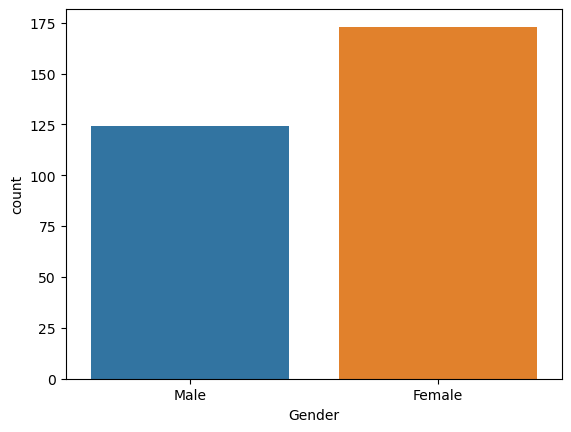

In [119]:
sns.countplot(data=df5_Suv,x='Gender')

Insights:
    1. Data shows Female buyers are buying more SUV's than Men

<Axes: xlabel='Make', ylabel='count'>

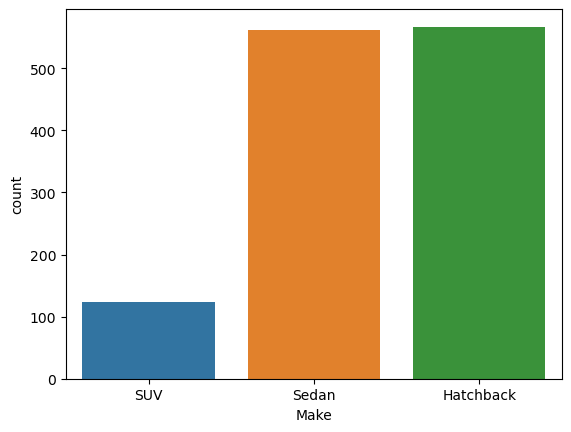

In [121]:
sns.countplot(data=df_Gender_M,x='Make')

Insights:
    1. Above Graph is for all Male Car buyers
    2. Clearly it is showinng SUV is least preffered Vehicle

In [122]:
df5.groupby('Gender')['Price'].sum().sort_values(ascending=False)

Gender
Male      40585000
Female    15695000
Name: Price, dtype: int64

Male's are spending significantly higher money than Female for buying cars

In [123]:
# Creating Data frame for people with Personal Loans
df5_pl = df_Gender_M =  df5[df5['Personal_loan'] == 'Yes']

In [124]:
df5_pl.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
6,53,Female,Salaried,Married,Post Graduate,3,Yes,No,Yes,80900,50800.0,131700,51000,SUV
10,52,Male,Salaried,Married,Post Graduate,4,Yes,No,No,81600,0.0,81600,67000,SUV
12,50,Female,Salaried,Married,Graduate,3,Yes,No,No,77400,0.0,77400,62000,SUV


In [125]:
df5_pl.shape

(792, 14)

In [128]:
df5_pl.Price.sum()

27290000

In [129]:
#Segreation by Men and Female
df5_pl.groupby('Gender')['Price'].sum().sort_values(ascending=False)

Gender
Male      20357000
Female     6933000
Name: Price, dtype: int64

In [165]:
#df5_pl.groupby('Gender')['Price'].sum().sort_values(ascending=False)
df5_pl.Gender.value_counts()

Male      643
Female    149
Name: Gender, dtype: int64

In [167]:
df5_pl.Gender.count()

792

In [175]:
#Creating Data Frame for Gender spent and groupped by price
genderspent = df5_pl.groupby('Gender')['Price'].sum().reset_index()

In [176]:
genderspent.shape

(2, 2)

In [177]:
gender_spendings.head()

,Gender,Price
0,Female,6933000
1,Male,20357000


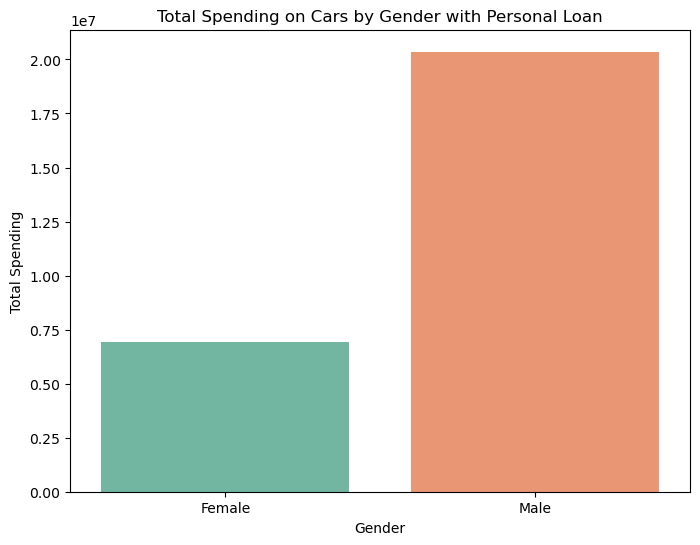

In [180]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Price', data=gender_spendings, palette='Set2')
plt.title('Total Spending on Cars by Gender with Personal Loan')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

In [181]:
#Creating Data Frame for Gender spent and groupped by price
genderspent_total = df5.groupby('Gender')['Price'].sum().reset_index()

In [182]:
genderspent_total.head()

,Gender,Price
0,Female,15695000
1,Male,40585000


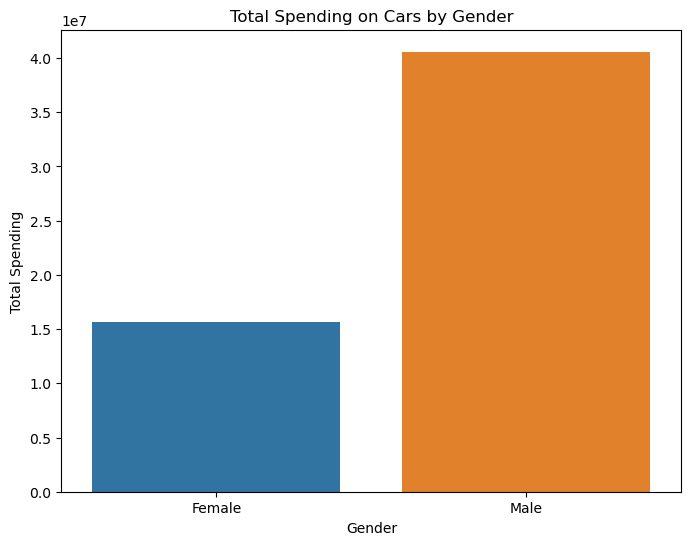

In [183]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Price', data=genderspent_total,)
plt.title('Total Spending on Cars by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Spending')
plt.show()

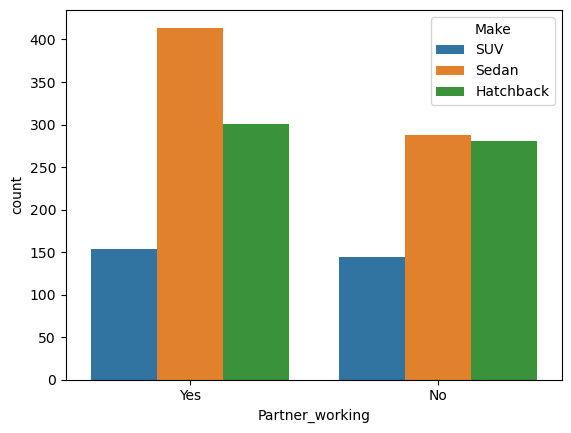

In [131]:
#Count plot to show Make of the vehicles where Partners are working.
sns.countplot(data=df5,x='Partner_working',hue='Make');

Insights:
    1. From the data it's clear that SUV's are highest priced cars
    2. There isnt mucch difference in particular that People with working partners are buying more SUV's
    3. However Sedan's are surely bought more by people who has working partners

In [132]:
newdf.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Salary_Bucket,Total_Salary_Bucket,Price_Bucket
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,H,H,H
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,H,H,H
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,H,H,H
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,M,H,H
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,H,H,H


In [133]:
newdf_wp = newdf[newdf['Partner_working'] == 'Yes']

In [135]:
newdf_wp.shape

(868, 17)

<Axes: title={'center': 'Cars based on Price bought by People with Working Partner'}, xlabel='Price_Bucket', ylabel='count'>

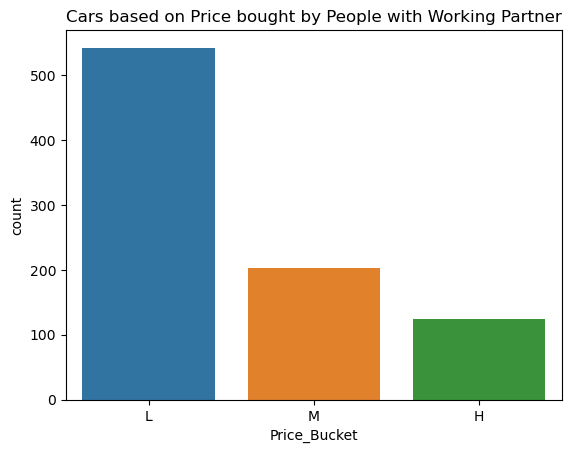

In [185]:
plt.title('Cars based on Price bought by People with Working Partner')
sns.countplot(data=newdf_wp,x='Price_Bucket')

In [186]:
newdf_wp.Price_Bucket.value_counts(normalize=True)

L    0.624424
M    0.232719
H    0.142857
Name: Price_Bucket, dtype: float64

Insights:
    1. This again proves Low priced cars are the preferred by most of the people whether thier partner is working or not.

In [147]:
#CReate a new Data frame for Salaried people
newdf_sp = newdf[newdf['Profession'] == 'Salaried']

<Axes: title={'center': 'Cars bought by Salaries People'}, xlabel='Make', ylabel='count'>

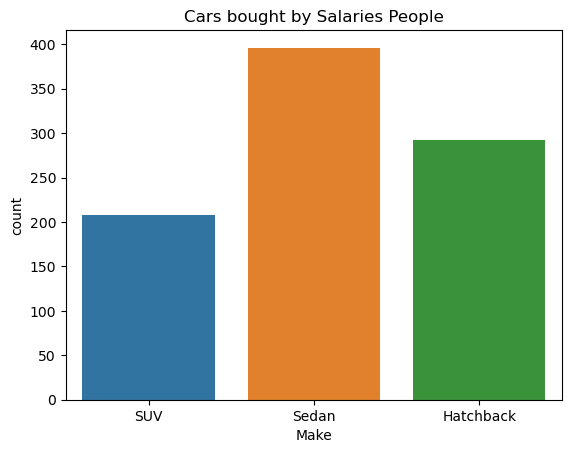

In [155]:
plt.title('Cars bought by Salaries People')
sns.countplot(data=newdf_sp,x='Make')

In [150]:
newdf_sp.shape

(896, 18)

In [154]:
#df5.No_of_Dependents.value_counts()
newdf_sp.Make.value_counts()

Sedan        396
Hatchback    292
SUV          208
Name: Make, dtype: int64

<Axes: title={'center': 'Cars bought by Salaries People'}, xlabel='Make', ylabel='count'>

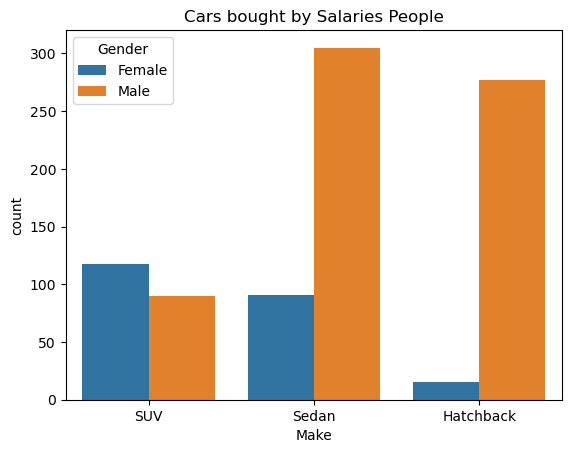

In [156]:
plt.title('Cars bought by Salaries People')
sns.countplot(data=newdf_sp,x='Make',hue='Gender')